In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Load the CSV file
file_path = "/Users/mahdipashaei/Desktop/karma_convection_data/with_Convection_contours.csv"
contours_data = pd.read_csv(file_path)

In [3]:
print(contours_data.head())

   TimeStep  Time  Vel:0  Vel:1  Vel:2  Press  Phi     U  velocity_PF:0  \
0         0   0.0    0.0    0.0      0    0.0 -1.0 -0.55            0.0   
1         0   0.0    0.0    0.0      0    0.0 -1.0 -0.55            0.0   
2         0   0.0    0.0    0.0      0    0.0 -1.0 -0.55            0.0   
3         0   0.0    0.0    0.0      0    0.0 -1.0 -0.55            0.0   
4         0   0.0    0.0    0.0      0    0.0 -1.0 -0.55            0.0   

   velocity_PF:1  velocity_PF:2       :0   :1  :2  
0            0.0              0   0.0000  0.0   0  
1            0.0              0   3.2051  0.0   0  
2            0.0              0   6.4103  0.0   0  
3            0.0              0   9.6154  0.0   0  
4            0.0              0  12.8210  0.0   0  


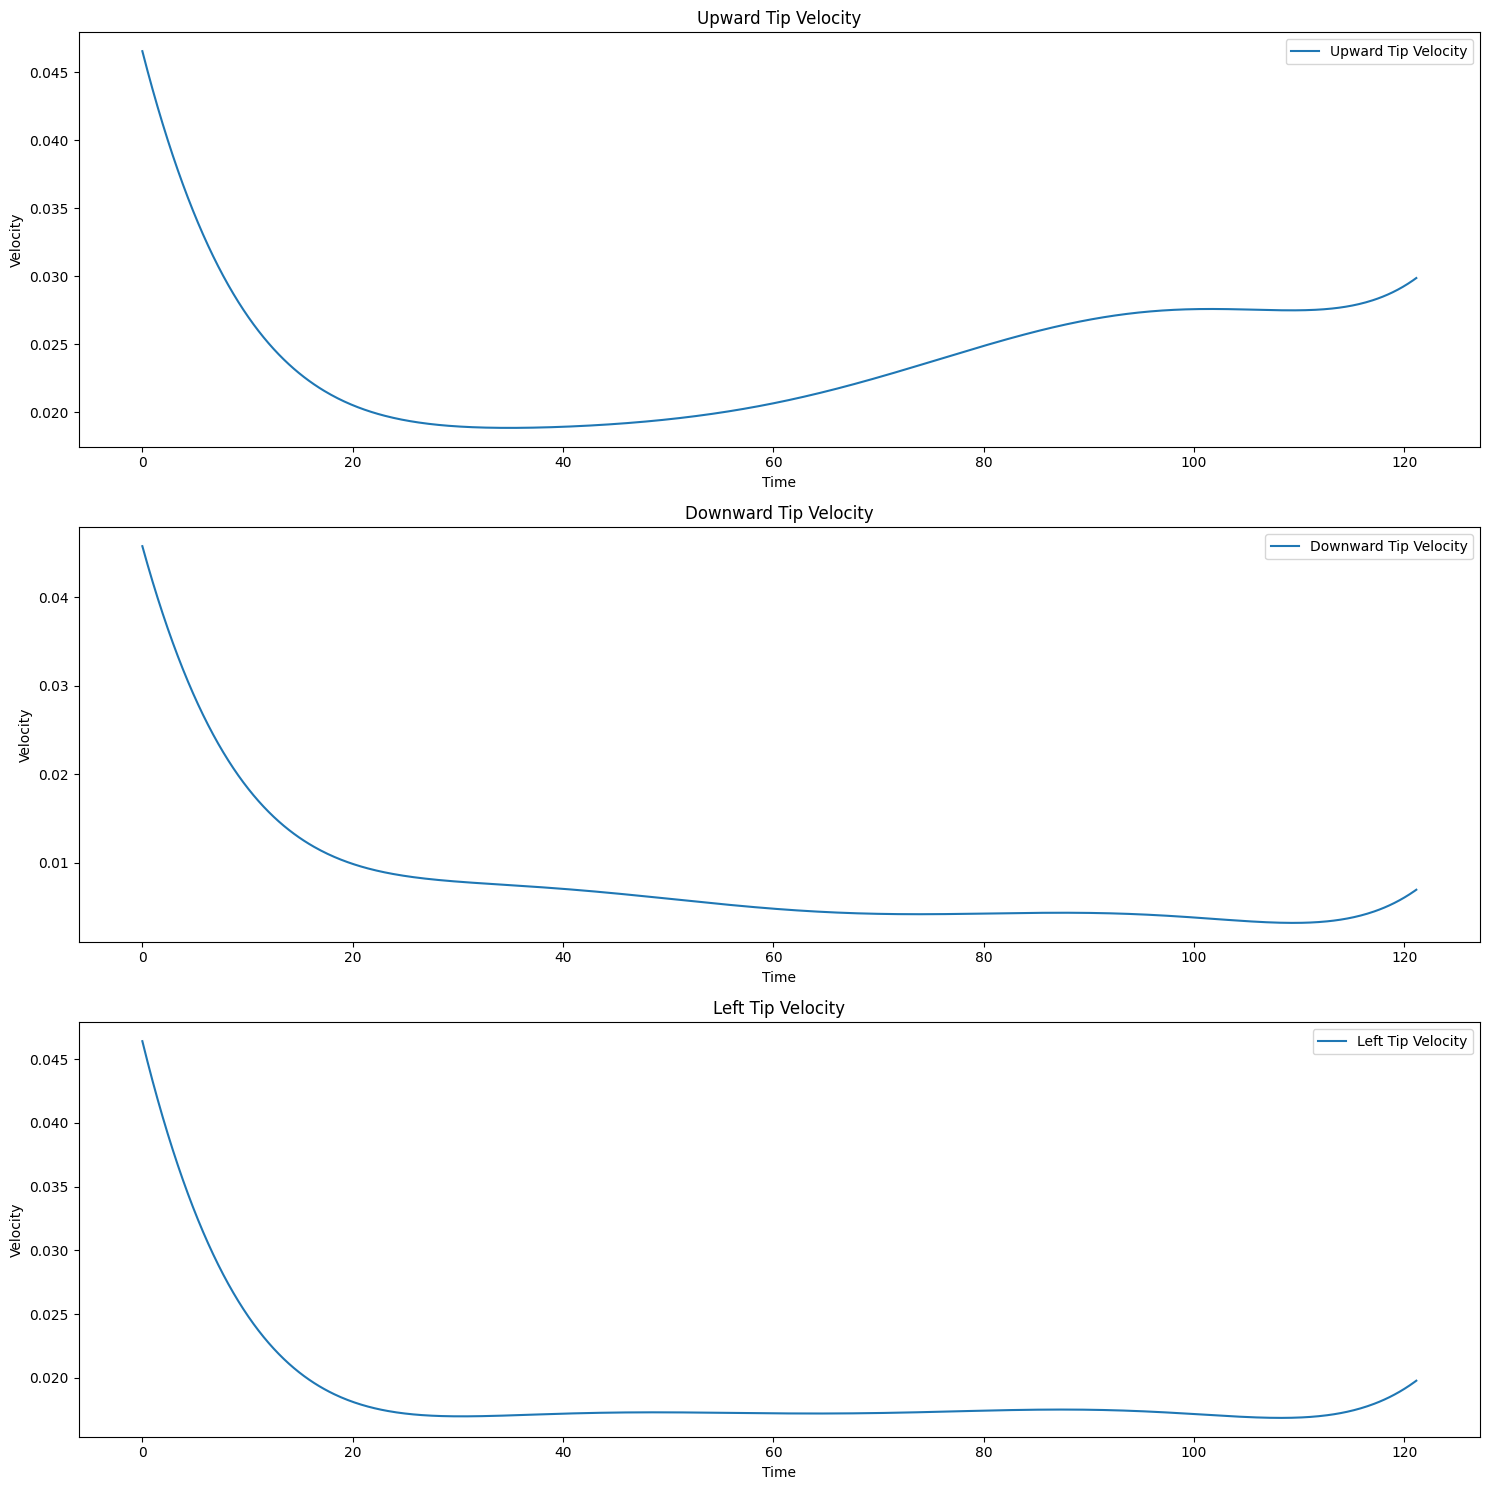

In [6]:

# Strip whitespace from column names
contours_data.columns = contours_data.columns.str.strip()

# Filter data where Phi is exactly 0 (interface)
interface_data_exact_zero = contours_data[contours_data['Phi'] == 0]

# Find the tip of the solid in different directions
upward_tip = interface_data_exact_zero.loc[interface_data_exact_zero.groupby('Time')['Points:1'].idxmax()]
downward_tip = interface_data_exact_zero.loc[interface_data_exact_zero.groupby('Time')['Points:1'].idxmin()]
left_tip = interface_data_exact_zero.loc[interface_data_exact_zero.groupby('Time')['Points:0'].idxmin()]

# Function to fit polynomial and calculate velocity
def calculate_velocity_polynomial(tip_data, direction, coordinate, degree=7):
    times = tip_data['Time'].to_numpy()
    positions = tip_data[coordinate].to_numpy()
    
    # Fit polynomial
    p = Polynomial.fit(times, positions, degree)
    
    # Calculate polynomial derivative
    dp = p.deriv()
    
    # Calculate velocities
    velocities = dp(times)
    tip_data['Velocity_' + direction] = velocities
    return tip_data

# Fit polynomials and calculate velocities for each tip direction
upward_tip_velocity = calculate_velocity_polynomial(upward_tip, 'upward', 'Points:1')
downward_tip_velocity = calculate_velocity_polynomial(downward_tip, 'downward', 'Points:1')
left_tip_velocity = calculate_velocity_polynomial(left_tip, 'left', 'Points:0')

# Divide all velocities by the specified value and take the absolute value
conversion_factor = 30.59273977746351
upward_tip_velocity['Velocity_upward'] = upward_tip_velocity['Velocity_upward'].abs() / conversion_factor
downward_tip_velocity['Velocity_downward'] = downward_tip_velocity['Velocity_downward'].abs() / conversion_factor
left_tip_velocity['Velocity_left'] = left_tip_velocity['Velocity_left'].abs() / conversion_factor


# Plotting
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(upward_tip_velocity['Time'], upward_tip_velocity['Velocity_upward'], label='Upward Tip Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Upward Tip Velocity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(downward_tip_velocity['Time'], downward_tip_velocity['Velocity_downward'], label='Downward Tip Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Downward Tip Velocity')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(left_tip_velocity['Time'], left_tip_velocity['Velocity_left'], label='Left Tip Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Left Tip Velocity')
plt.legend()

plt.tight_layout()
plt.show()
